In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import random

In [4]:
with open('C:\\hseworkspace\\network-analysis\\friends.txt', 'r') as outfile:
    friends_dict = json.loads(outfile.read())

In [77]:
#friends_dict = {'1':[2,10,15], '2': [1, 10, 11, 24], '3':[10, 13], '10': [3, 15], '15':[1, 10]}

Making the adj matrix

In [6]:
myfriends = sorted([int(x) for x in list(friends_dict.keys())])
size=len(myfriends)
adj_matrix = []
for friend in myfriends:
    scope = friends_dict[str(friend)]
    row = []
    for k in myfriends:
        if k in scope:
            row.append(1)
        else:
            row.append(0)
    adj_matrix.append(row)
AM = np.matrix(adj_matrix)

Counting the k

In [ ]:
#Count of triangles = trace(A3) / 6

In [7]:
AM_3 = AM.dot(AM).dot(AM)
trace = AM_3.trace().min()
k = trace/6
print("K = {}".format(k))

K = 16082.5


Degree distribution

In [8]:
degrees = []
for friend in adj_matrix:
    degrees.append(sum(friend))

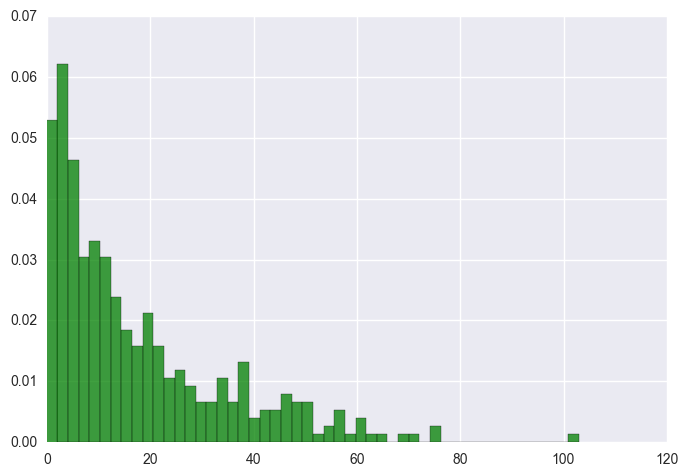

In [9]:
n, bins, patches = plt.hist(degrees, 50, normed=1, facecolor='green', alpha=0.75)
plt.show()

vizualization

In [33]:
import networkx as nx
G=nx.Graph()

In [35]:
for i in range(len(adj_matrix)):
    G.add_node(i)
for i in range(len(adj_matrix)):
    for j in range(i):
        if adj_matrix[i][j] == 1:
            G.add_edge(i, j)

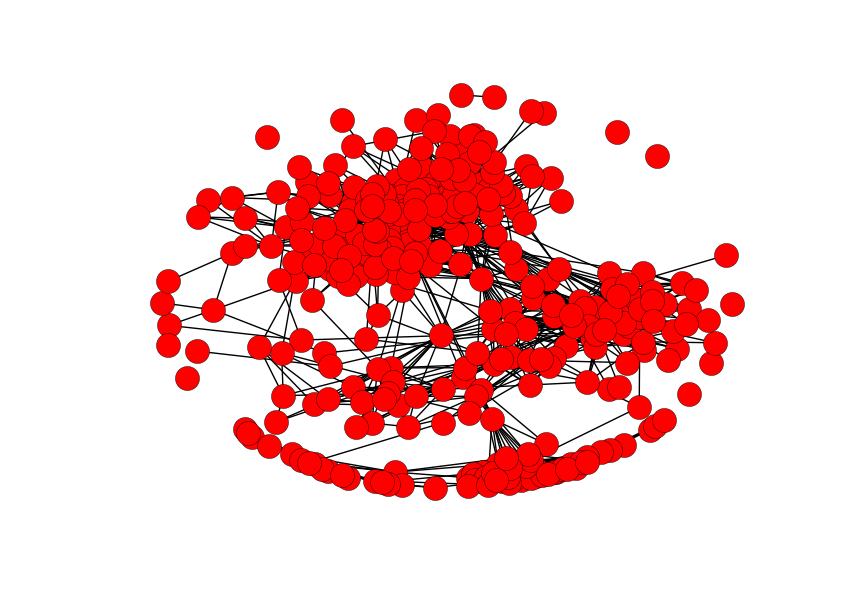

In [43]:
nx.draw_spring(G)
plt.show()

In [159]:
#SOMETHING WRONG

Erdős–Rényi model

In [29]:
def generate_erdos_renyi(nodes, probability):
    graph = empty_graph(nodes)
    for i in range(nodes):
        for j in range(i):
            if random.random() < probability:
                graph[i][j] = 1
                graph[j][i] = 1
    return graph

In [30]:
ern = generate_erdos_renyi(4, 0.2)

In [31]:
ern

[[0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0]]

In [14]:
def empty_graph(n):
    g = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(0)
        g.append(row)
    return g

In [16]:
qwe = empty_graph(5)
qwe

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]